In [1]:
import covid19_spread, sir, seir, sei, basic_methods, reported_data
import numpy as np
import pylab as plt

In [2]:
i0 = 10 #initial number of infected individuals
num_days = 50 #number of days to model the virus for

# <center> Modelling the Spread of COVID 19
![image](covid.jpg)
    
**In the midst of the COVID 19 pandemic, mathematical modelling has become increasingly important. What will the future of the virus look like? How many people will ultimately be infected by COVID 19? What does it mean to flatten the curve? These are all frequently heard questions. For my project, I use six different models to predict the course of the coronavirus over time. I am predicting the number of infected individuals in the US as a whole: not a specific state or city and not looking at any of the other many countries affected by the virus.**
    
*The models used are a Linear Model, Exponential Model, Logistic Model, SIR Model, SEIR Model and SEI Model. The Linear, Exponential and Logistic Models are formulated using basic math and easily computed. I will refer to these three as "Basic Models" because they do not require differential equation solvers to solve. The SIR, SEIR and SEI Models are formulated by a system of differential equations. The solving technique I used is Runge-Kutta 4. In SIR, SEIR and SEI, S represents the susceptible population; E represents the exposed population; I represents the infected population; R represents the recovered population.*

## Reported Data
In order to determine which model is the most accurate, we need to compare to the reported data. The CDC website provides data for the total number of individuals who have been infected by COVID 19 in the US. Each of my models displays the number of new cases for a given day. So, I needed to adjust the cumulative data reported by the CDC to match the type of data I am modelling. To do this, I created a new array, where the value of each index is equal to the change in the total number of infected individuals on that day and the total number of infected invidiuals on the next day. 

I could not find a way that I was capable of to scrape the data from the CDC website, so I had to manually enter the number of cases into my program. Other than the time-consuming nature of having to enter each data point into the program, the main flaw of not accessing the data from the website is that it doesn't update. The data I entered covers January 22, 2020 to April 29, 2020. As the CDC updates their data for coming days, my program will not include the new data. 

I plotted the number of new cases per day versus the number of days since the first person was infected in the US.

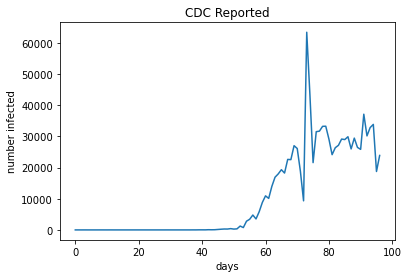

In [3]:
reported_data.main()

## Linear Model
The Linear Model is made based on the assumption that the difference of new cases each day will remain constant. For example, if there are 100 newly infected individuals on Day 1, then there will be 200 newly infected individuals on Day 2, and 300 newly infected individuals on Day 3. This method is very simple computationally because, to solve for the number on a certain day, you only need to add a constant to the number from the day before. 

<center> $y_{k+1} = y_k + a$

The Linear Model is easily the most simplistic model there is: it is extremely unlikely for the spread of a virus to increase at a constant rate each day. In the equation above, the only variable that we need to know is $a$, or the linear rate of infection. Since the model is so simplistic, there is no data available for the linear rate of infection for COVID 19. So, my code of this model uses an arbitrary value of $a=100$. Note that this value can easily be changed in the *linear* function of the *basic_methods.py* file.
    
I plotted the number of infected individuals by the Linear Model versus the number of days since the first person was infected.

Text(0.5, 1.0, 'Linear Model')

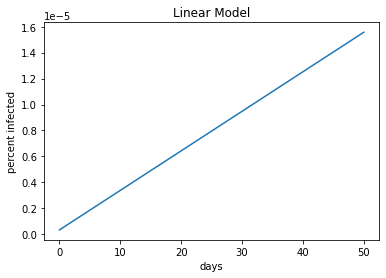

In [4]:
linear_infected = basic_methods.linear(i0,num_days)
plt.plot(range(len(linear_infected)),linear_infected)
plt.xlabel('days')
plt.ylabel('percent infected')
plt.title('Linear Model')

## Exponential Model

The Exponential Model is made based on the assumption that the number of new cases for a given day abides by the same rate of growth from previous days. That is, the number of newly infected individuals for a given day is equal to the number of newly infected individuals from the prior day times some rate. That rate will be the same for each day we are modelling.

<center> $y_{k+1} = a*y_k$
    
The Exponential Model is widely criticised because it shows no end to the rapid increase in infected individuals. The function keeps increasing at such a large rate that it will quickly tend towards infinity. Since the model is not accepted, there is no data available for the rate of growth between each day. Thus, I decided to use the basic reproductive number as the rate of growth. The basic reproductive number is a property of both the specific virus and the culture around the virus: it takes into account how easily that specific virus can spread and also the number of social interactions in a given day or how well the population is social distancing. An article, "High Contagiousness and Rapid Spread of Acute Respiratory Syndrome Coronavirus 2", by Steven Sanche, Yen Ting Lin and others conclude a basic reproductive number of 2.2-2.7. So, I used a value of 2.45 (the middle value of the range of reproductive values) for b. Note that this value can easily be changed in the *exponential* function of the *basic_methods.py* file.
    
I plotted the number of infected individuals by the Exponential Model versus the number of days since the first person was infected.

Text(0.5, 1.0, 'Exponential Model')

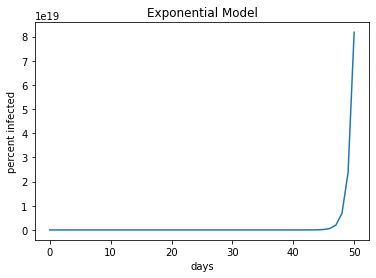

In [5]:
exponential_infected = basic_methods.exponential(i0,num_days)
plt.plot(range(len(exponential_infected)),exponential_infected)
plt.xlabel('days')
plt.ylabel('percent infected')
plt.title('Exponential Model')

Note the scale in the upper left corner of the Exponential Model grpah. The y axis represents the percent of the US population infected on each day due to coronavirus. As I mentioned earlier, the Exponential Model is criticised because it increases at too great of a rate. By day 100, the Exponential Model reaches a number of 8e19 percent of the US population, which is obviously outrageous. 

## Logistic Model
The Logistic Model is based on the assumption that, as the number of infected individuals increases, the infection rate decreases. The logistic function requires a maximum number of infected individuals that the function will never exceed. 

<center> $y_{k+1} = a*(1-\frac{y_k}{I_{max}})*y_k$
    
where $a =$ rate of infection and $I_{max} =$ maximum number of infected individuals. We can look at this logistic function and analyse the end behaviour. For a small number of infected individuals, $y_k$, the terms inside the parentheses tend to 1. Thus, the function becomes $y_{k+1} = a*y_k$, which is the exponential function we used above. This means that the function initially follows the same path as the Exponential Model. As the number of infected individuals for a given day increases and becomes close to the maximum number of infected individuals for that given day, the $\frac{y_k}{I_{max}}$ term tends to 1, which causes the terms inside the parentheses to tend to 0. Thus, the function becomes $y_{k+1} = 0$. This means that, when the funciton hits its maximum number of infected individuals for a given day, the number of newly infected invididuals will remain the same for future days. This function requires two values: $a$ and $I_{max}$. I could not find any credible data for these values, so I handpicked values. I decided to choose a maximum number of newly infected individuals for a given day to be 1 million. I decided to not use the same infection rate as the Exponential Model because it did not preserve the expected shape of the logistic curve, so I chose an infection rate of 1. Note that these values can easily be changed in the *exponential* function of the *basic_methods.py* file.
    
I plotted the number of infected invididuals by the Logistic Model versus the number of days since the first person was infected.

Text(0.5, 1.0, 'Logistic Model')

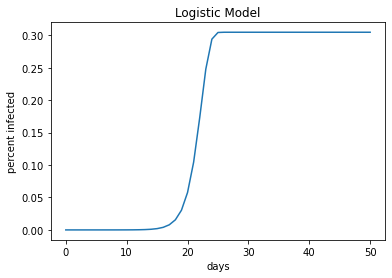

In [6]:
logistic_infected = basic_methods.logistic(i0,num_days)
plt.plot(range(len(logistic_infected)),logistic_infected)
plt.xlabel('days')
plt.ylabel('percent infected')
plt.title('Logistic Model')

## SIR Model

The SIR Model measures the susceptible, infected and recovered populations during the spread of a virus. The term "recovered" includes both the population that has recovered from the virus but also the population that has died from the virus. As with any mathematical model, there were several assumptions made in creating the SIR Model. One assumption is that the susceptible population size does not increase: there are no births or people entering the country included. The model is represented by a set of differential equations:

$
\begin{align*}
\frac{ds}{dt} &= -bs(t)i(t) \\
\frac{di}{dt} &= bs(t)i(t)-ki(t) \\
\frac{dr}{dt} &= ki(t)
\end{align*}
$
    
Notice that the $\frac{ds}{dt}+\frac{di}{dt}+\frac{dr}{dt} = 0$. That is, the total population size does not change with time. 

This system of differential equations was solved using the Runge-Kutta 4 method, which is detailed later. The SIR Model requires two unknown parameters specific to the virus and the culture around the virus. These two parameters are $b$, the number of contacts per day that are sufficient to spread the disease, and $k$, the fixed fraction of the infected group that will recover in the day. Note that $b$ is equal to the basic reproductive number that many websites and companies discuss. For the same reasoning as the Exponential Method, I decided to use a basic reproductive number value of 2.45 for the SIR Model. It is not very simple to assign a value to the number of infected individuals that will recover in a given day due to the range of severity of COVID 19 cases. Hopkins Medicine has found that mild cases of coronavirus take about 2 weeks to recover, while more severe cases can take up to 6 weeks. According to Discover Magazine, roughly 80% of cases are mild, which leaves the remaining 20% of cases to be severe. Thus, I derived the following fraction of the infected group that recovers in a given day to be $.8*(2*7) + .2*(6*7)$. Note that these values can easily be changed in the *f* function of the *sir.py* file.

The SIR Model returns the susceptible, infected and recovered populations over time. I plotted each of these populations versus the number of days since the first case. 

Maximum percent of population to be infected is 0.8817934275877068


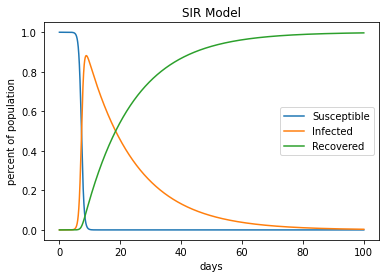

In [7]:
sir.main()

In the graph of the SIR Model, the blue curve represents the susceptible population; the orange curve represents the infected population; the green curve represents the recovered population. Notice that the maximum percentage of the population to be infected by coronavirus is 88.18%.

## SEIR Model

The SEIR Model measures the susceptible, exposed, infected and recovered populations during the spread of a virus. The model is represented by a set of differential equations where each of the four populations are continuous with time. 

$
\begin{align*}
\frac{dS}{dt} &= -\beta\frac{S}{N}I \\
\frac{dE}{dt} &= \beta\frac{S}{N}I - \omega E \\
\frac{dI}{dt} &= \omega E - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align*}
$

Similarly to the SIR Model, one assumption made by the SEIR Model is that no one is entering the population. That is, $\frac{dS}{dt} + \frac{dE}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = 0$. 

This system of differential equations was solved using the Runge-Kutta 4 method, which will be detailed later. The SIR Model requires several uknown parameters: $\beta, N, \omega$ and $\gamma$. As with any other model, the spread of the virus is dependent on the basic reproductive number, which is $\beta$ for the SEIR Model. "Dynamics of COVID-19 Epidemics: SEIR Models Underestimate Peak Infection Rates and Overestimate Epidemic Duration" further explains this reproductive number that so many models used. It claims that $\beta = \beta_0k$ where $\beta_0$ is the "probability of infection per encounter with an infected individual" and $k$ is the "number of people encountered per day". This equation shows how $\beta$ is reliant on both properties of the virus ($\beta$) and social distancing ($k$). Using the same argument as described for the Exponential Method, I used a value of $\beta = 2.45$. $N$ represents the population size. Since we are looking at the data as a percentage of the total population and not as number of individuals in the population, we will use a population size of $N = 1$. $\omega = \frac{1}{T_e}$ where $T_e$ is the latent period. According to Hopkins Medicine, it takes a maximum of 14 days for symptoms to show. Since this is different for each person infected, I used a random number generator to choose some random number between 1 and 14 for the latent period. Thus, $\omega = \frac{1}{random.randrange(1,14)}$. The last parameter is $\gamma = \frac{1}{T_i}$ where $T_i$ is the average recovery time. Using the same reasoning for deriving the recovery time in the SIR Model, I set $T_i = .8*(2*7) + .2*(6*7)$, so $\gamma = \frac{1}{19.6}$. Note that these values can easily be changed in the *f* function of the *seir.py* file. 

The SEIR Model returns the susceptible, exposed, infected and recovered populations over time. I plotted each of these populations versus the number of days since the first case.

Maximum percent of population to be infected is 0.6608537031519313


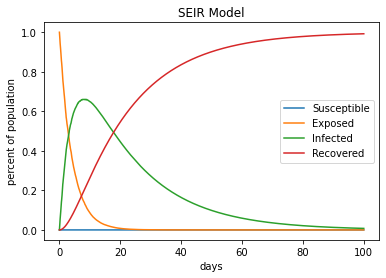

In [8]:
seir.main()

In the graph of the SEIR Model, the blue curve represents the susceptible population; the orange curve represents the exposed population; the green curve represents the infected population; the red curve represents the recovered population. Notice that the maximum percentage of the population to be infected by coronavirus is 65.74%.

## SEI Model

The SEI Model represents the susceptible, exposed and infected populations during the spread of a virus. The model is represented by a set of differential equations.

$
\begin{align*}
\frac{dS}{dt} &= -\frac{S}{N}(\frac{R_0}{D_i}I+z)+L_{II}+L_{ID}-(\frac{L_{OI}}{N}+\frac{L_{OD}}{N})S \\
\frac{dE}{dt} &= \frac{S}{N}(\frac{R_0}{D_i}I+z)-\frac{E}{D_E}-(\frac{L_{OI}}{N}+\frac{L_{OD}}{N})E \\
\frac{dI}{dt} &= \frac{E}{D_E}-\frac{I}{D_i}-(\frac{L_{OI}}{N}+\frac{L_{OD}}{N})I
\end{align*}
$

Unlike the SIR Model and the SEIR Model, the SEI Model accounts for people entering the population through travel (either domestic or international). Similarly to the other models, it does not account for people entering the population as a result of childbirth. 

The system of differential equations was solved using Runge-Kutta 4, which will be detailed later. 

The SEI Model requires several additional unknown parameters in comparison to the other differential equation models: $N, R_0, D_i, D_E, z, L_{II}, L_{ID}, L_{OI}, L_{OD}$. As with the other models, we are looking at the percentage of the total population and not number of individuals, so we use a population size of $N = 1$. $R_0$ represents the same reproductive number that we used in the other models. For the same reasoning (as described in the Exponential Model), I used a value of $R_0 = 2.45$. $D_i$ represents the mean infectious period, which I set to $.8*(2*7)+.2*(6*7)$ for the same reasoning as described in the SIR Model. $D_E$ represents the mean latent period. As with the SEIR Model, I used a random number generator to set the mean latent period equal to some number of days less than the maximum number of days for symptoms to show, so $D_E = random.randrange(1,14)$. 

The next five parameters have not been used in any of the other models that we have looked at. The SEI Model is not as popular as some of its counterparts, so there are not easily accessible values for the following parameters. Thus, I had to guess some values for the variables. $z$ represents the number of people infected by the animal source. Since the virus began from an animal source, this parameter could add some insight on another way the virus could spread. While the value of $z$ may be more meaningful in China, where the virus was transmitted from animals, I assumed the value of $z$ to be 0 for the US population. $L_{II}$ represents the number of inbound international travellers to the US, and $L_{OI}$ represents the number of outbound international travellers from the US. I could not find any data on the numbers of travellers during COVID 19, so I set each of these parameters equal to an arbitrary value of 0.01: 1% of the US population travelling inbound internationally and 1% of the US population travelling outbound internationally. $L_{ID}$ represents the number of inbound domestic travellers to the US, and $L_{OD}$ represents the number of outbound domestic travellers from the US. Since I am modelling the spread of the virus in the US population and not in a specific state or city, there are no domestic travellers inbound or outbound: domestic travellers do not leave or enter the US population because they stay within the country. So, I set $L_{ID}=L_{OD}=0$. Note that all of these values can easily be changed in the *f* function of the *sei.py* file.

As you can see, a lot of these models use the same parameters. Since the models come from different sources, they are often given different variable names. Each of the models differs in how they apply the parameters and which parameters they use.

The SEI Model returns the susceptible, exposed and infected populations over time. I plotted each of these populations versus the number of days since the first case.

Maximum percent of population to be infected is 0.6419331324069889


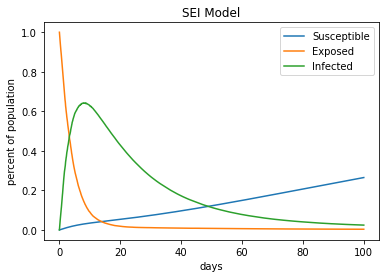

In [9]:
sei.main()

In the graph of the SEI Model, the blue curve represents the susceptible population; the orange curve represents the exposed population; the green curve represents the infected population. Notice that the maximum percentage of the population to be infected by the coronavirus is 64.25%.

## Runge-Kutta 4

The Runge-Kutta is a highly accredited differential equation solver in computational physics. It is well known for achieving high accuracy while not requiring us to know the expression for the function to calculate further derivatives. The Runge-Kutta methods include many different methods, many of which achieve different orders of accuracy. The fourth-order Runge-Kutta Method is more difficult to solve by hand than the second-order Runge-Kutta Method, but, computationally, we can easily solve the fourth-order Runge-Kutta Method. Thus, I chose to use the fourth-order method because it achieves an error of order $h^5$, while the second-order method achieves an error of order $h^3$. The equations for the fourth-order method are:

$
\begin{align*}
k_1 &= hf(x,t) \\
k_2 &= hf(x+\frac{1}{2}k_1,t+\frac{1}{2}h) \\
k_3 &= hf(x+\frac{1}{2}k_2,t+\frac{1}{2}h) \\
k_4 &= hf(x+k_3,t+h) \\
x(t+h) &= x(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)
\end{align*}
$

## Analysis

Method			Maximum Percent Infected	Day of Maximum Infections
-------------------------------------------------------------------------------------
Linear:			0.003080%				100
Exponential:		6.3619e+48%				100
Logistic:		30.469226%				28
SIR:			88.179343%				8
SEIR:			66.118403%				7
SEI:			63.910411%				7
-------------------------------------------------------------------------------------
Maximum reported is 0.00019334247410115782 on day 73


<Figure size 432x288 with 0 Axes>

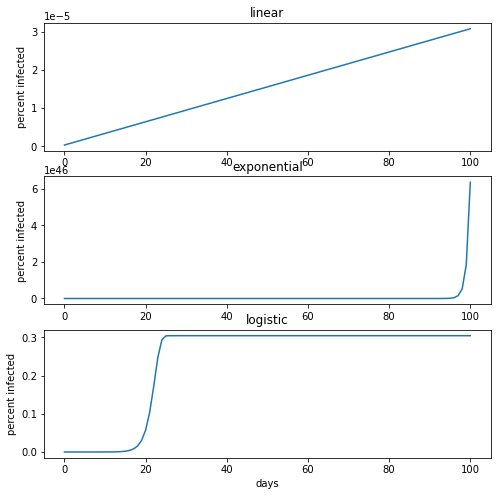

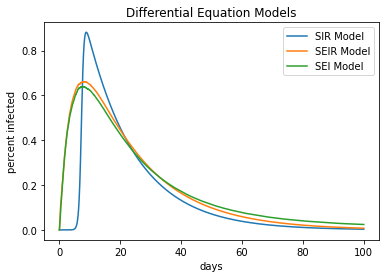

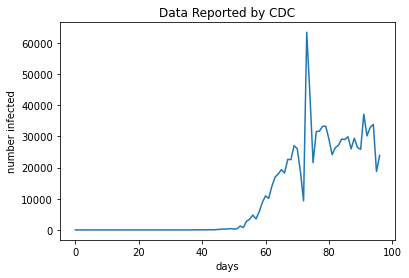

In [10]:
covid19_spread.main()

Above is the graphs of each of the six models I have discussed as well as the graph of the data reported by the CDC. As you can see, the Linear Model, the Exponential Model and the Logistic Model both resemble popular mathematical functions but may not be as applicable to modelling the spread of an infectious disease. The scales of the y axis for each of those three methods are vastly different: the Linear Model ranges from 0 to 3e-5; the Exponential Model ranges from 0 to 6e46; the Logistic Model ranges from 0 to 0.3. While none of the three models are accredited as accurate, we can see that the order of the Logistic Model is the only one of the three models that could make sense. 

Even though the SIR, SEIR and SEI Models return their respective combination of the susceptible, exposed, infected and recovered populations, the above graph only displays the infected population for each of the three models. While it is important to look at each population, what we truly care about is how many US citizens are getting infected by the coronavirus. Comparing the SIR, SEIR and SEI models, we can see that the SEIR Model and the SEI Model fit each other very closely. Meanwhile, the SIR Model has a higher peak than the other two. Since these three models are very similar, it helps to plot them on the same graph: we can see which models have a higher peak and at what day the peak exists, which models start to increase first and other properties of the three models. 

Comparing the data reported by the CDC with the six models, we can see that coronavirus will last a lot longer. The spike around Day 70 for the data reported by the CDC looks like it might be an outlier. If you eliminate that spike, the data looks to follow an upward slope with the rate of change decreasing after around Day 70. Thus, it's difficult to compare the real data with our models because the relative ranges of days are not comparable. Looking at the table above, we can see the maximum number of infected individuals on a given day, or the peak, for each model and the day on which the peak occurred. 

As I already mentioned, the Linear and Exponential Models do not provide a realistic peak value: the maximum number of newly infected individuals in a day is 0.003080% of the population according to the Linear Model, and the maximum number of newly infected individuals in a given day according to the Exponential Model is 6.3619e48% of the population. Neither of these values make sense because, as we have noticed with COVID 19, the percent of the population infected is nowhere near as small or large as either of those values. We can also see that it is unreasonable because of the day that the maximum infection occurs. For both the Linear and Exponential Models, the day on which maximum infection occurs is Day 100 of 100 days modelled. The infected population for both of these models is constantly increasing, which implies that the spread of the coronavirus will never end - more and more total people will get infected each day.

Since the graphs show the number of newly infected individuals in a given day, the end behaviour for large day numbers needs to reach 0 in order for the disease to stop spreading. In the Logistic Model, the curve stops increasing around Day 30, which corresponds to a constant number of newly infected individuals for the following days. Although the rate of the curve is constant, each day, more people are getting infected, so the spread of the disease never stops. Thus, we can claim that the Logistic Model is not reasonable either. 

The SIR Model has a peak of 88.179343% of the population on Day 8. The peaks of the SEIR and SEI Models is very similar: the SEIR Model saw a maximum number of infected individuals on Day 8 of 65.848466%; the SEI Model saw a maximum number of infected individuals on Day 8 of 64.020060%. We have no way of telling which of these three methods is the most accurate. 

## Acknowledgements

![image](Works_Cited.png)